### This notebook processes this project's hypothesis 1: 
#### Electronic waste generation per capita and % of material recovery (recycling + composting) have a strong relationship with education. We will use both education attainment and education expenditure statistics to evaluate the relationship.

In [30]:
%matplotlib inline

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import datetime
import climate_change_util as cc #Importing util file with functions as module
import Hypothesis_2and3 as cc2

In [2]:
clean_df = pd.read_csv('clean_df.csv') #Importing cleaned and merged csv file created in the data processing file. 

In [3]:
clean_df = clean_df.drop(['Unnamed: 0'],axis=1)

In [40]:
clean_df.head(20)

,Year,COU,Country,Composting%,Disposal%,Landfill%,Material_recovery%,Recovery%,Recycling%,Amt_for_recovery_operations,...,Education_expense_%_of_total_exp,Population_density,Population_growth%,Population_female,Population_female_%,Population_total,Poverty_headcount%_ppp,Poverty_headcount%_national_line,Population_urban%,Population_urban_growth%
0,1990,AUT,Austria,23.171,56.277,56.277,34.529,43.723,11.358,1536.00,...,11.513110,93.042293,0.762002,4005232,52.166067,7677850,NaN,NaN,62.960,0.332494
1,1990,BEL,Belgium,5.983,66.751,43.853,11.108,33.249,5.125,1317.00,...,NaN,NaN,0.298236,5090672,51.073323,9967379,NaN,NaN,96.377,0.386473
2,1990,CHE,Switzerland,6.341,22.680,22.680,28.547,77.320,22.207,3170.60,...,17.181641,169.888411,1.026873,3437405,51.185991,6715519,NaN,NaN,73.926,0.945759
3,1990,CHN,China (People's Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120.448249,1.467303,552721134,48.689961,1135185000,72.0,NaN,26.442,4.309678
4,1990,DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,227.517054,0.861969,41104568,51.747451,79433029,NaN,NaN,73.118,1.056365
5,1990,ESP,Spain,20.330,76.210,74.345,20.846,23.790,0.516,3000.05,...,10.142290,77.821804,0.101829,19827512,51.013323,38867322,0.5,NaN,75.351,0.400879
6,1990,GBR,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,700.00,...,11.099460,236.628719,0.298931,29420457,51.391611,57247586,NaN,NaN,78.140,0.234965
7,1990,GRC,Greece,NaN,94.043,94.043,5.957,5.957,5.957,178.70,...,7.198430,79.106222,1.057808,5141255,50.420321,10196792,NaN,NaN,71.467,1.321212
8,1990,HUN,Hungary,0.000,92.807,92.807,0.000,7.193,0.000,300.00,...,NaN,115.433270,-1.033117,5391730,51.973555,10373988,NaN,NaN,65.838,-0.990579
9,1990,ITA,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,192.850430,0.083709,29146541,51.387397,56719240,NaN,NaN,66.726,0.053739


In [5]:
clean_df.columns

Index(['Year', 'COU', 'Country', 'Composting%', 'Disposal%', 'Landfill%',
       'Material_recovery%', 'Recovery%', 'Recycling%',
       'Amt_for_recovery_operations', 'Composting', 'Electronic_waste',
       'Household_waste', 'Landfill', 'Municipal_waste_generated',
       'Municipal_waste_generated_percapita', 'Municipal_waste_generated_1990',
       'Municipal_waste_generated_2000', 'Municipal_waste_treated',
       'Recycling', 'Total_Incineration', 'Waste_from_households', 'Country_y',
       'CO2_emissions_percapita', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Energy_use_percapita', 'Forest_area', 'GDP_2015_USD', 'GDP_growth%',
       'GDP_percapita_2015_USD', 'GDP_percapita_growth%',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp',
       'Population_density', 'Population_growth%', 'Population_female',
       'Population_female_%', 'Population_total', 'Poverty_headcount%_ppp',
 

In [6]:
# Subsetting dataframe to keep relevant columns for hypothesis 1
hyp1_df = pd.DataFrame(data=clean_df, columns=['Year','COU','Country','Material_recovery%','Electronic_waste',\
                                               'Population_total','Female_education_attainment_bach','Male_education_attainment_bach',\
                                               'Total_education_attainment_bach','Education_expense_%_of_gdp',\
                                               'Education_expense_%_of_total_exp'])

In [7]:
hyp1_df.columns

Index(['Year', 'COU', 'Country', 'Material_recovery%', 'Electronic_waste',
       'Population_total', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp'],
      dtype='object')

In [8]:
#Creating electronic waste generation per capita variable
hyp1_df['Electronic_waste_percapita'] = hyp1_df['Electronic_waste']/hyp1_df['Population_total']

In [9]:
hyp1_df.dtypes

Year                                  int64
COU                                  object
Country                              object
Material_recovery%                  float64
Electronic_waste                    float64
Population_total                      int64
Female_education_attainment_bach    float64
Male_education_attainment_bach      float64
Total_education_attainment_bach     float64
Education_expense_%_of_gdp          float64
Education_expense_%_of_total_exp    float64
Electronic_waste_percapita          float64
dtype: object

In [10]:
#Converting object to string
hyp1_df['COU'] = hyp1_df['COU'].astype('string')
hyp1_df['Country'] = hyp1_df['Country'].astype('string')

In [11]:
hyp1_df.dtypes

Year                                  int64
COU                                  string
Country                              string
Material_recovery%                  float64
Electronic_waste                    float64
Population_total                      int64
Female_education_attainment_bach    float64
Male_education_attainment_bach      float64
Total_education_attainment_bach     float64
Education_expense_%_of_gdp          float64
Education_expense_%_of_total_exp    float64
Electronic_waste_percapita          float64
dtype: object

### Histogram  and density plots of each vairable

In [12]:
plot_list = hyp1_df[['Material_recovery%','Electronic_waste','Electronic_waste_percapita']]

def hist_plots(df,var): 
    plt.hist(df[var], bins='auto', color='#0504aa')
    plt.title(var)
    plt.show()
   

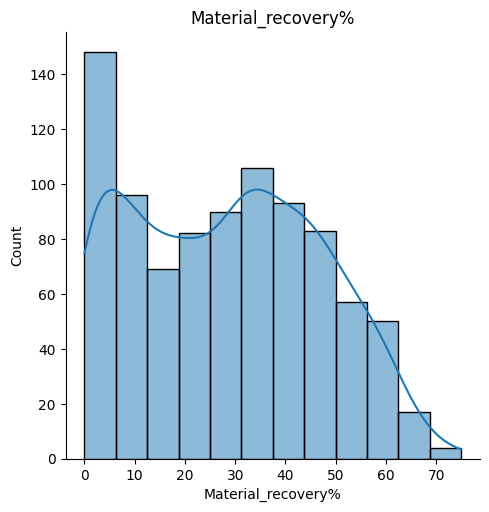

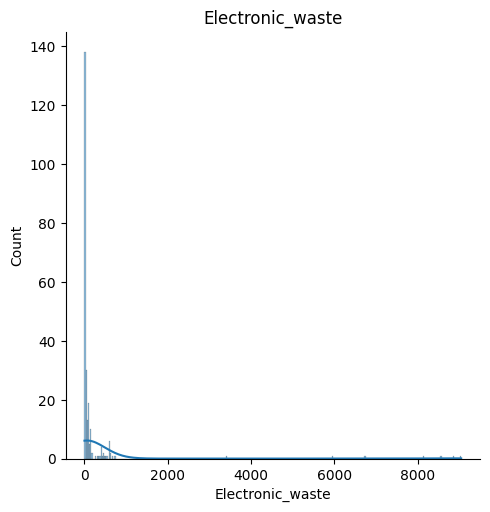

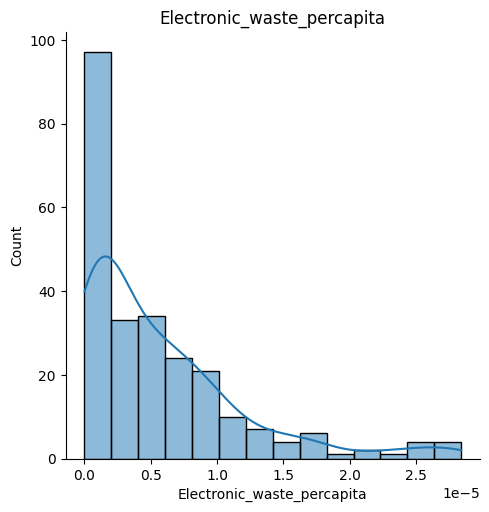

In [13]:
for var in plot_list:
    cc.density_plots(hyp1_df,var)

###### Observations: Both variables are non-normal. 

### Overall trends of variables

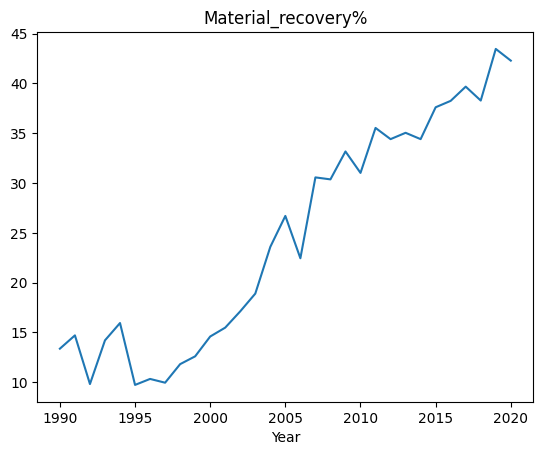

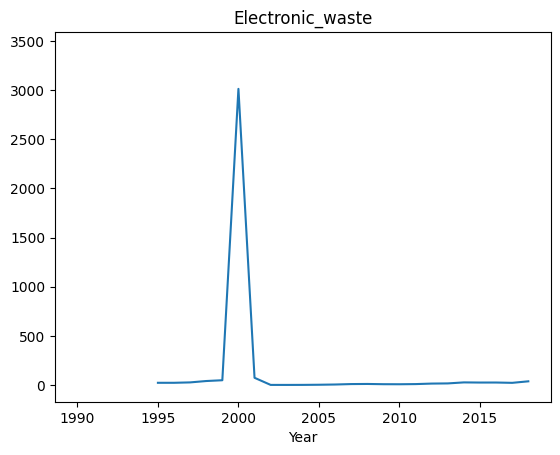

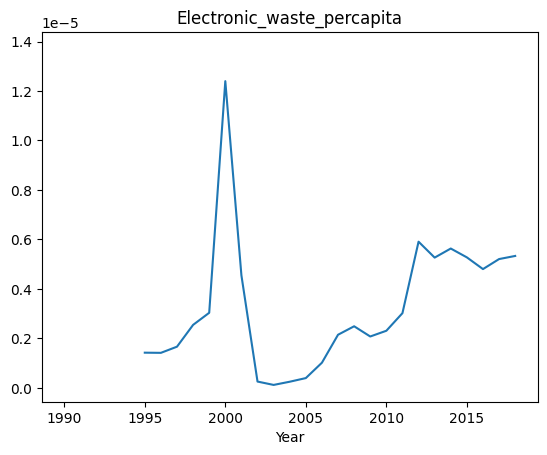

In [14]:
for var in plot_list:
    cc.median_trend_plots(hyp1_df,'Year',var)

###### Observations (median trends over time, on an average for the developed world):

1. Material recovery has had a sharp upward trend post 1995. 

2. Electronic waste generation had a peak around 2000 but flattened quickly and remained so. 

3. Electronic waste per capita had a similar peak and fell down right after. However, It has had an upward trend in the recent years. 

### Median share of each country for each variable

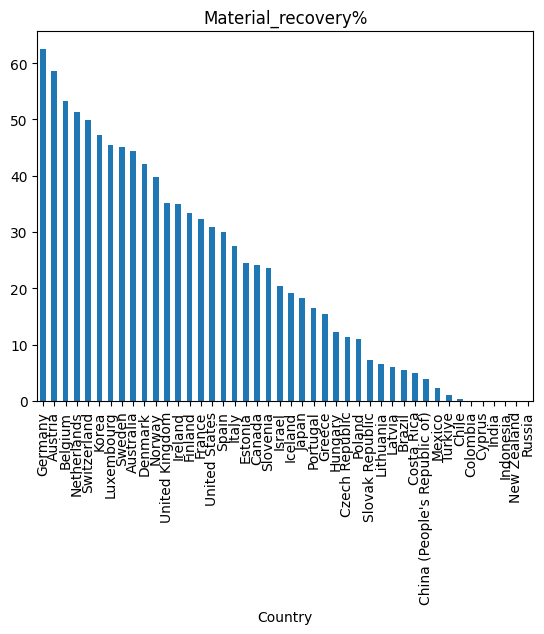

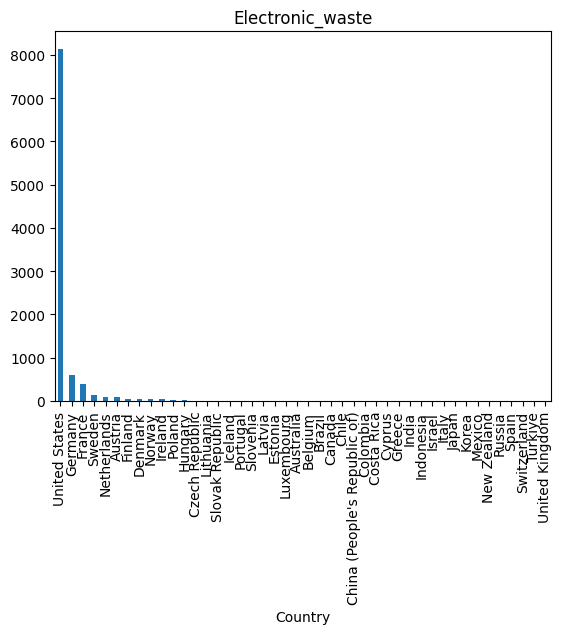

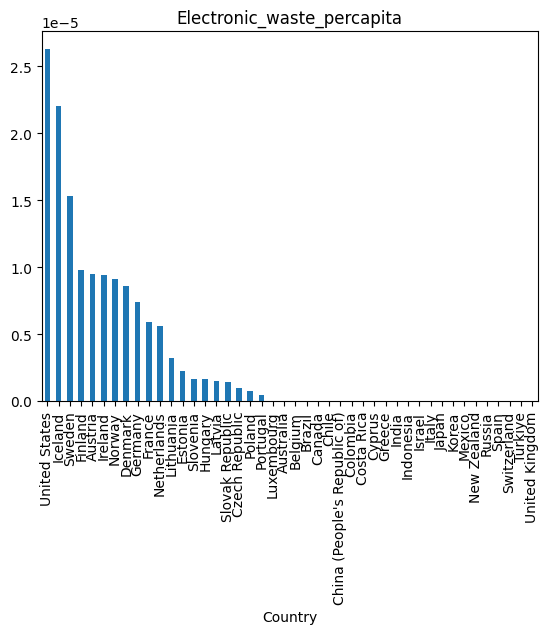

In [15]:
for var in plot_list:
    hyp1_df.groupby('Country')[var].median().sort_values(ascending=False).plot(kind='bar', title=var)
    plt.xlabel('Country')
    plt.show()

###### Observations (on average over time) :

1. United States generates the most electronic waste per capita and overall (8000 tonnes). 

2. Germany has the most amount of material recovery over time (60%).

### Time trend for each variable

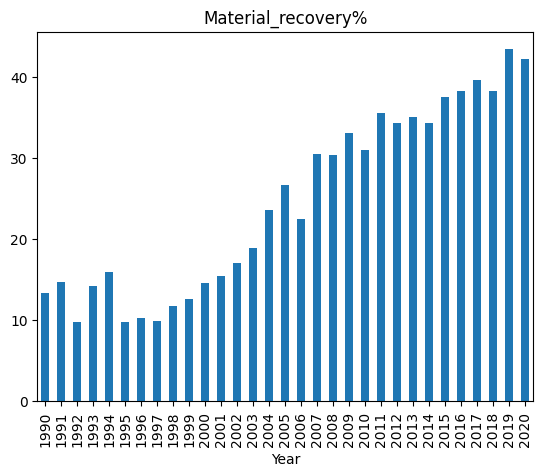

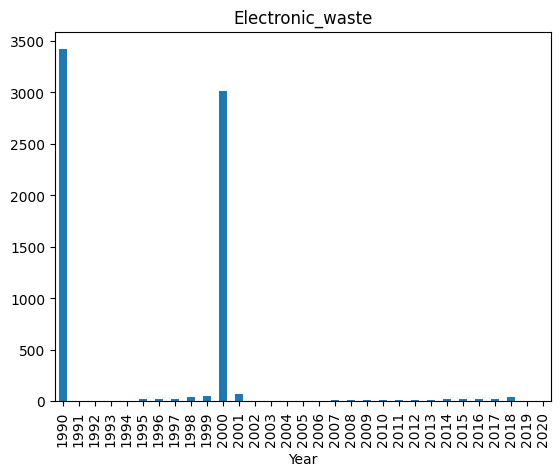

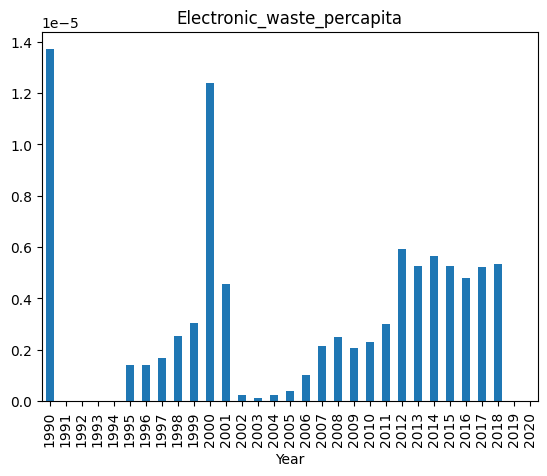

In [16]:
for var in plot_list:
    hyp1_df.groupby('Year')[var].median().plot(kind='bar', title=var)
    plt.xlabel('Year')
    plt.show()

###### Observations:
1. Material recovery peaked in 2019. Overall, it has been higher in the recent years. 

2. Electronic waste generation peaked in 1990 and 2000. For all other years, including recent ones, it has been negligible. 

3. Electronic waste generation per capita also peaked in 1990 and 2000. However, it has had considerable shares in other years as well. 


In [17]:
# Creating lists of variables to iterate on for plotting
plot_list = hyp1_df[['Material_recovery%','Electronic_waste','Electronic_waste_percapita']]

Educ_attainment_list = hyp1_df[['Female_education_attainment_bach',\
                    'Male_education_attainment_bach','Total_education_attainment_bach']]

Educ_expense_list = hyp1_df[['Education_expense_%_of_gdp','Education_expense_%_of_total_exp']]

## Scatter plots to infer correlation

### Material Recovery and Education Attainment

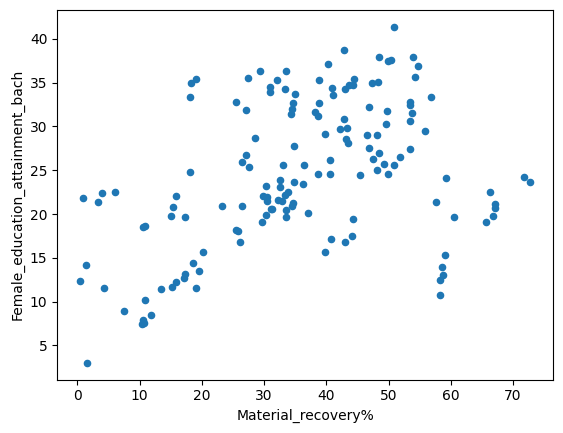

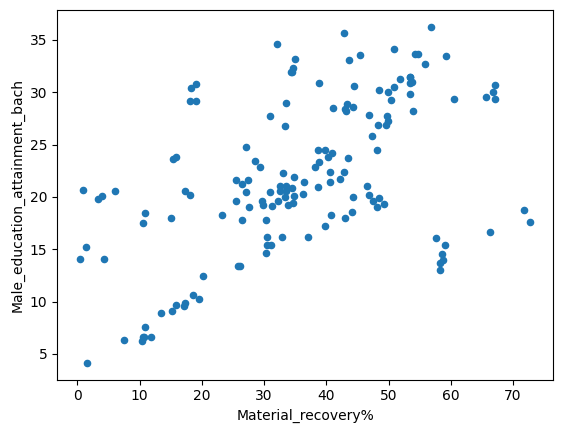

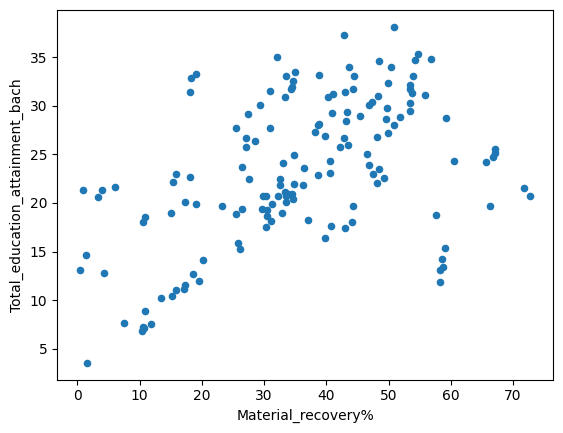

In [18]:
for var in Educ_attainment_list:
    hyp1_df.plot.scatter(x="Material_recovery%", y=var)

###### Observations:
Education attainment, including that of female and male, seem to have a linear relationship with material recovery. More material recovery % seems to be correlated with higher education attainment. 


### Electronic Waste Generation Per Capita and Education Attainment

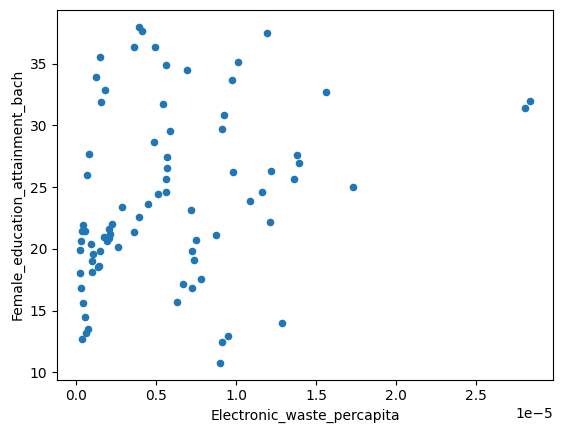

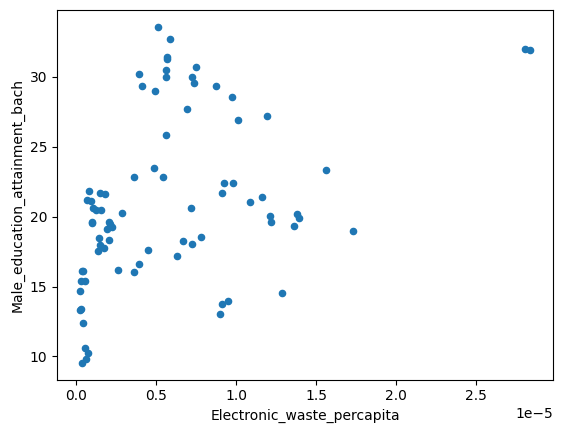

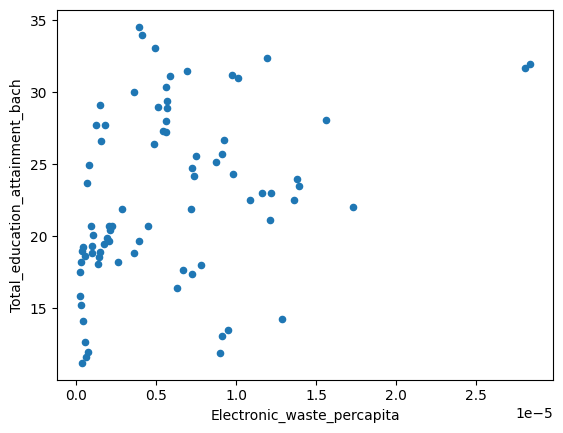

In [19]:
for var in Educ_attainment_list:
    hyp1_df.plot.scatter(x="Electronic_waste_percapita", y=var)

###### Observations:
Education attainment, including for that of female and male, mostly remain constant irrespective of the levels of electronic waste generation per capita. There does not seem to be an obvious relationship between education attainment and electronic waste generated per capita. 

### Electronic Waste Generation and Education Attainment

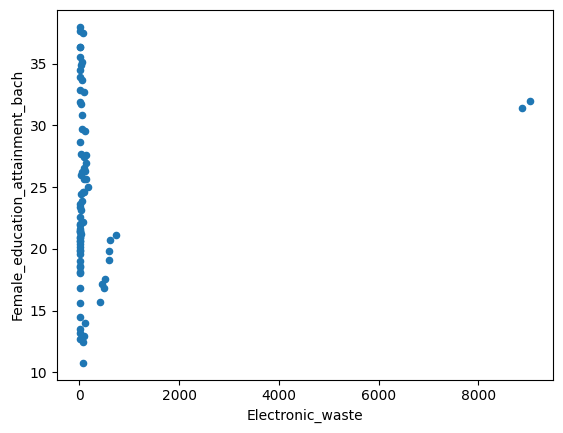

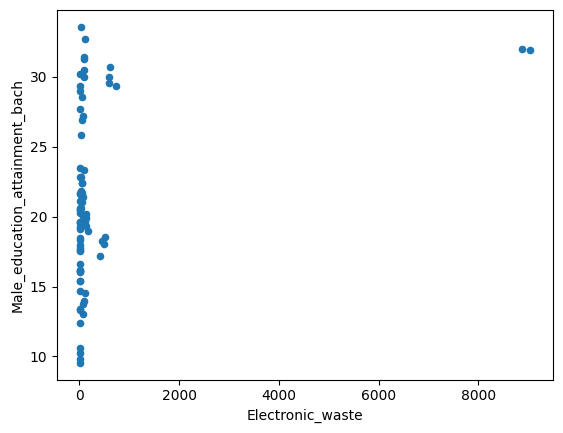

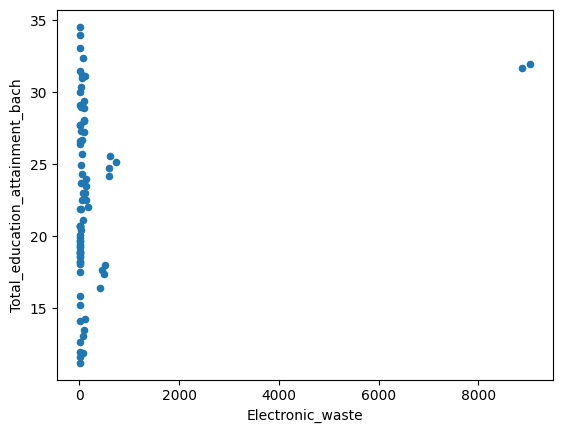

In [20]:
for var in Educ_attainment_list:
    hyp1_df.plot.scatter(x="Electronic_waste", y=var)

###### Observations:
Education attainment, including for that of female and male, remain constant irrespective of the levels of electronic waste generation. There does not seem to be an obvious relationship between education attainment and electronic waste generated overall. 

### Material Recovery and Education Expenditure

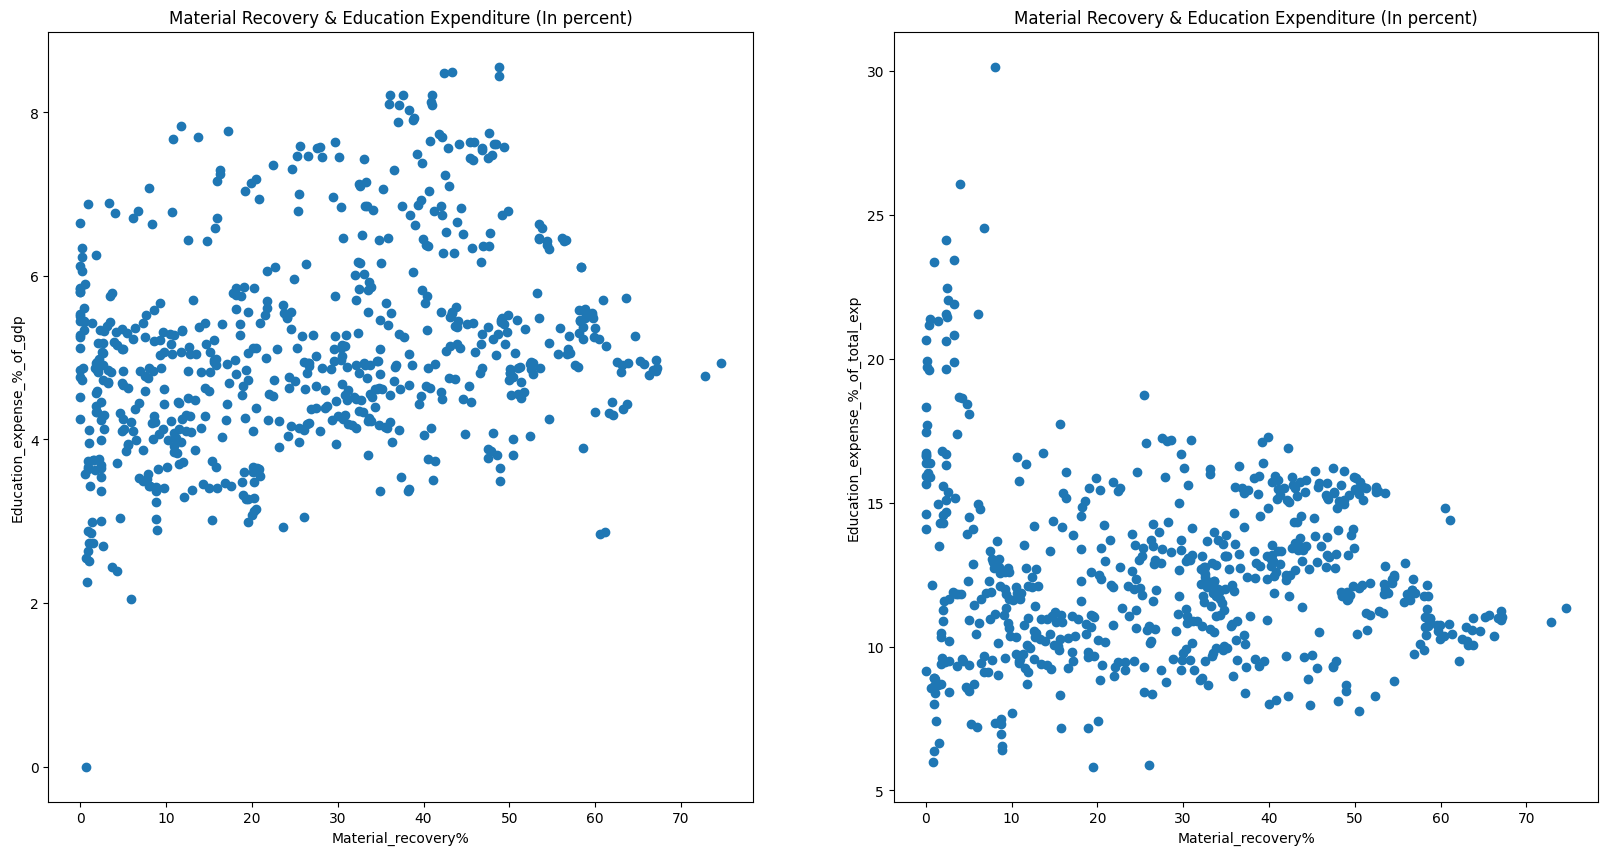

In [21]:
i = 0
fig, ax = plt.subplots(figsize=(20,10), nrows = 1, ncols = 2)
for var in Educ_expense_list:
    ax[i].set(xlabel='Material_recovery%', ylabel=var)
    ax[i].set_title('Material Recovery & Education Expenditure (In percent)')
    ax[i].scatter(x=hyp1_df['Material_recovery%'], y=hyp1_df[var])
    i += 1


###### Observations:
At higher levels (4-7%) of education expense as % of GDP, there is a linear relationship with material recovery. For education expense as % of total government expense has a linear relationship with material recovery at its lower levels (5-15%). 

### Electronic Waste Generation Per Capita and Education Expenditure

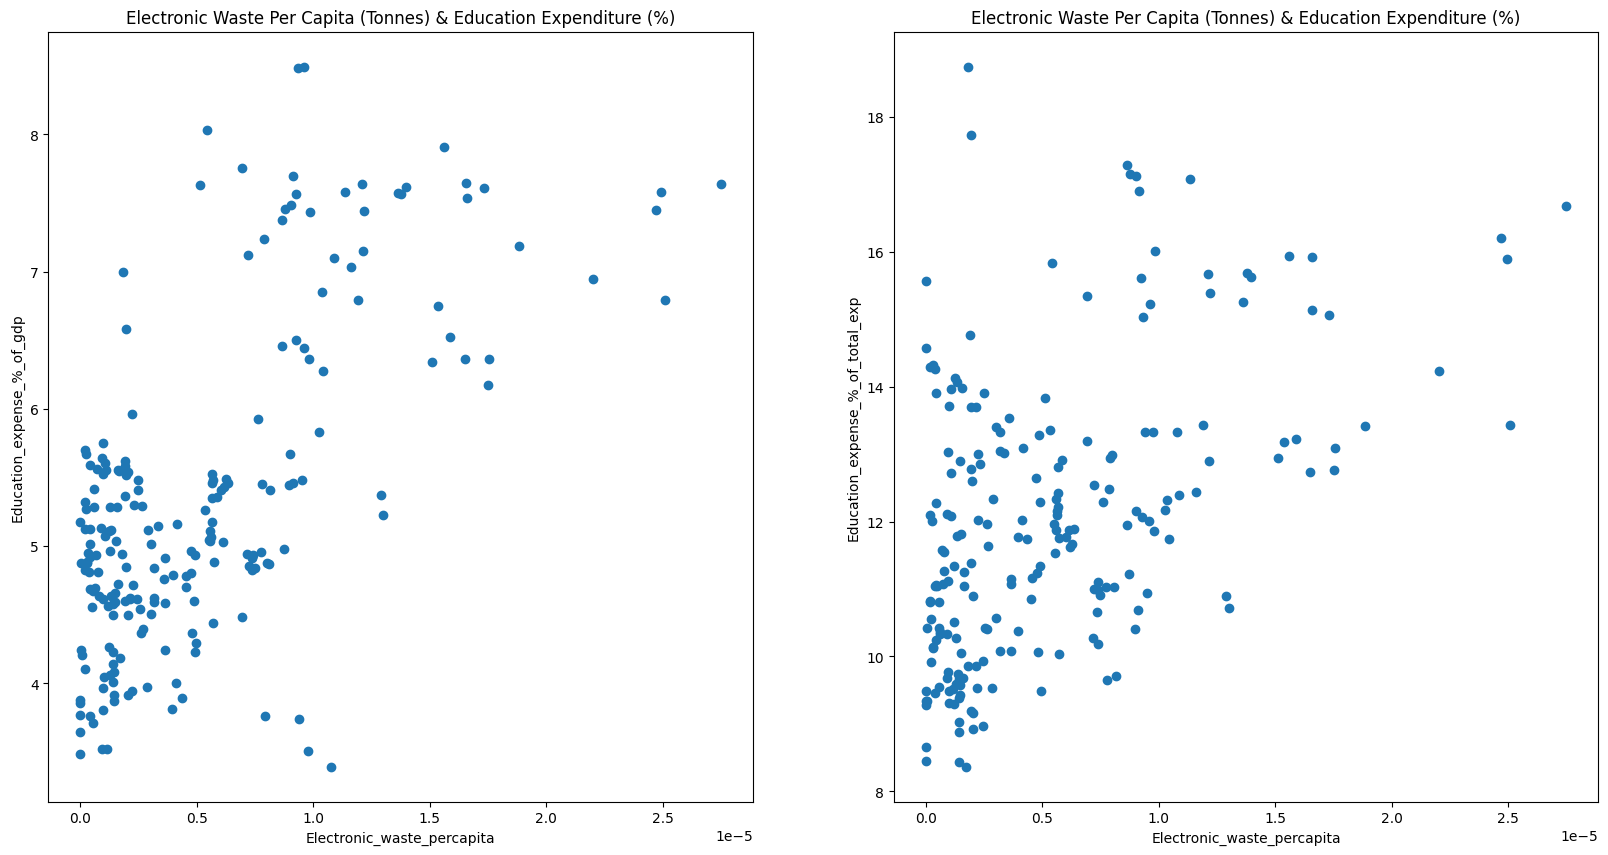

In [22]:
i = 0
fig, ax = plt.subplots(figsize=(20,10), nrows = 1, ncols = 2)
for var in Educ_expense_list:
    ax[i].set(xlabel='Electronic_waste_percapita', ylabel=var)
    ax[i].set_title('Electronic Waste Per Capita (Tonnes) & Education Expenditure (%)')
    ax[i].scatter(x=hyp1_df['Electronic_waste_percapita'], y=hyp1_df[var])
    i += 1


###### Observations:
Education expense, both as a percentage of GDP and that of total expenditure remains mostly unaffected by levels of electronic waste generation percapita, barring some outliers at high levels.

### Electronic Waste and Education Expenditure

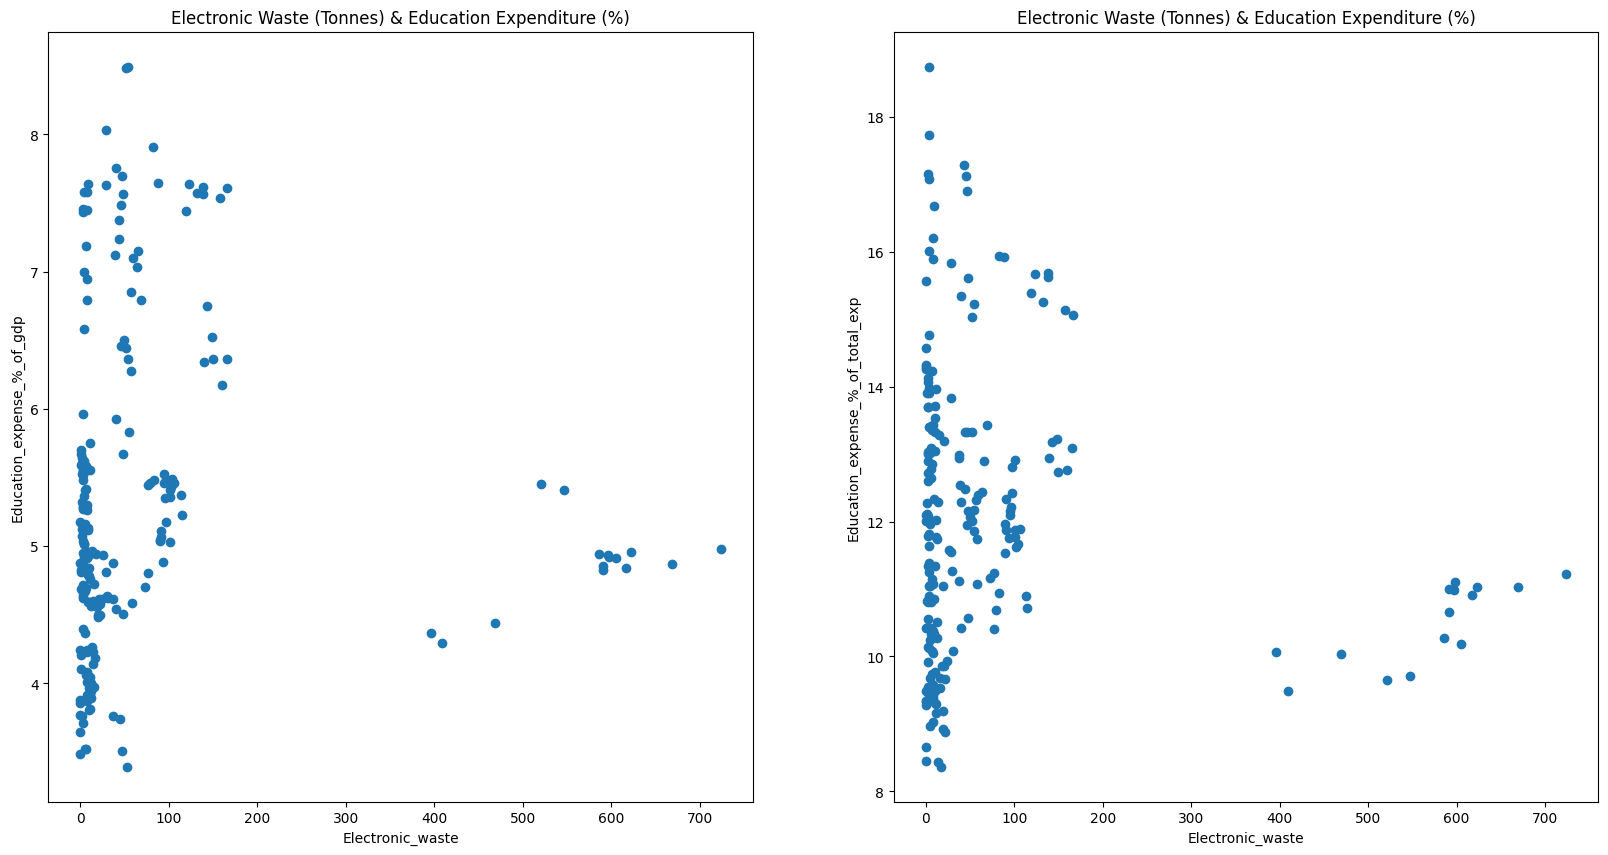

In [23]:
i = 0
fig, ax = plt.subplots(figsize=(20,10), nrows = 1, ncols = 2)
for var in Educ_expense_list:
    ax[i].set(xlabel='Electronic_waste', ylabel=var)
    ax[i].set_title('Electronic Waste (Tonnes) & Education Expenditure (%)')
    ax[i].scatter(x=hyp1_df["Electronic_waste"], y=hyp1_df[var])
    i += 1

###### Observations:
Education expense, both as a percentage of GDP and that of total expenditure remains constant irrespective of the levels of electronic waste generation.

### Overall Correlation Matrix

In [24]:
corr_matrix = hyp1_df.corr()
strong_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.5]
print(strong_corr_matrix)


                                      Year  Material_recovery%  \
Year                              1.000000                 NaN   
Material_recovery%                     NaN            1.000000   
Electronic_waste                       NaN                 NaN   
Population_total                       NaN                 NaN   
Female_education_attainment_bach  0.513089                 NaN   
Male_education_attainment_bach         NaN            0.512776   
Total_education_attainment_bach   0.513157                 NaN   
Education_expense_%_of_gdp             NaN                 NaN   
Education_expense_%_of_total_exp       NaN                 NaN   
Electronic_waste_percapita             NaN                 NaN   

                                  Electronic_waste  Population_total  \
Year                                           NaN               NaN   
Material_recovery%                             NaN               NaN   
Electronic_waste                          1.000000       

/var/folders/74/0s3qg3912fzfj_dgytz558vr0000gn/T/ipykernel_53321/2162578916.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hyp1_df.corr()


### Overall Correlation Matrix Plots

/var/folders/74/0s3qg3912fzfj_dgytz558vr0000gn/T/ipykernel_53321/669649818.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = hyp1_df.corr()


<AxesSubplot: >

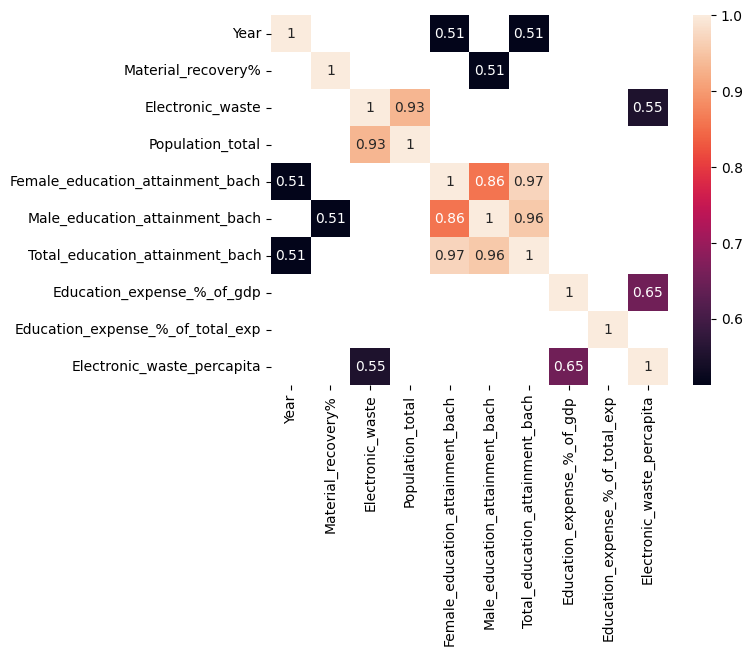

In [25]:
cor = hyp1_df.corr()
cor = cor[abs(cor)>0.5]
sns.heatmap(cor, annot=True)

###### Conclusion
1. Electronic waste generation has a high correlation with total population. 

2. Electronic waste generated per capita is also strongly correlated with education expense as a % of GDP. 

### Spearman Correlation Between Variables of Interest for Each Country

In [26]:
#Creating country and variable pairwise list
Country_list = hyp1_df['Country'].unique()
corr_varlist = [('Electronic_waste','Education_expense_%_of_total_exp'), ('Electronic_waste','Education_expense_%_of_gdp'),\
               ('Electronic_waste_percapita','Education_expense_%_of_total_exp'), ('Electronic_waste_percapita','Education_expense_%_of_gdp'),\
               ('Material_recovery%','Education_expense_%_of_total_exp'), ('Material_recovery%','Education_expense_%_of_gdp'),\
               ('Electronic_waste','Total_education_attainment_bach'),\
               ('Electronic_waste_percapita','Total_education_attainment_bach'),\
               ('Material_recovery%','Total_education_attainment_bach'), \
               ('Electronic_waste','Female_education_attainment_bach'), \
            ('Electronic_waste_percapita','Female_education_attainment_bach'), \
               ('Material_recovery%', 'Female_education_attainment_bach'),\
               ('Electronic_waste','Male_education_attainment_bach'),\
            ('Electronic_waste_percapita','Male_education_attainment_bach'),\
               ('Material_recovery%', 'Male_education_attainment_bach')]


Austria:  spearman's correlation: 0.600
Germany:  spearman's correlation: 0.795
Hungary:  spearman's correlation: -0.385
Luxembourg:  spearman's correlation: nan
Netherlands:  spearman's correlation: 0.656
Norway:  spearman's correlation: -0.286
Poland:  spearman's correlation: 0.000
Portugal:  spearman's correlation: 0.527
Sweden:  spearman's correlation: -0.644
Finland:  spearman's correlation: 0.247
France:  spearman's correlation: 1.000
Slovak Republic:  spearman's correlation: -0.238
Denmark:  spearman's correlation: -0.143
Czech Republic:  spearman's correlation: 0.486
Estonia:  spearman's correlation: -0.437
Ireland:  spearman's correlation: 0.564
Iceland:  spearman's correlation: -0.271
Lithuania:  spearman's correlation: -0.518
Latvia:  spearman's correlation: -0.044
Slovenia:  spearman's correlation: -0.819


/Users/vibha/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


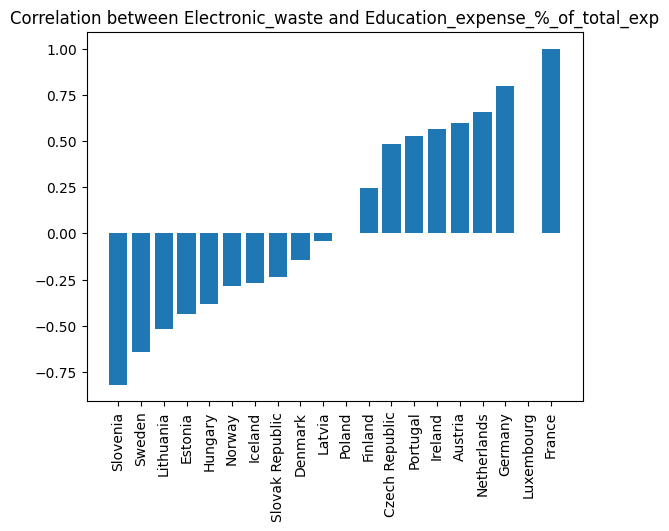

Austria:  spearman's correlation: -0.600
Germany:  spearman's correlation: 0.682
Hungary:  spearman's correlation: -0.477
Luxembourg:  spearman's correlation: nan
Netherlands:  spearman's correlation: 0.841
Norway:  spearman's correlation: 0.071
Poland:  spearman's correlation: 0.000
Portugal:  spearman's correlation: 0.027
Sweden:  spearman's correlation: -0.421
Finland:  spearman's correlation: 0.352
France:  spearman's correlation: -1.000
Slovak Republic:  spearman's correlation: -0.054
Denmark:  spearman's correlation: -0.029
Czech Republic:  spearman's correlation: 0.600
Estonia:  spearman's correlation: 0.218
Ireland:  spearman's correlation: -0.975
Iceland:  spearman's correlation: 0.119
Lithuania:  spearman's correlation: -0.764
Latvia:  spearman's correlation: -0.148
Slovenia:  spearman's correlation: -0.821


/Users/vibha/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


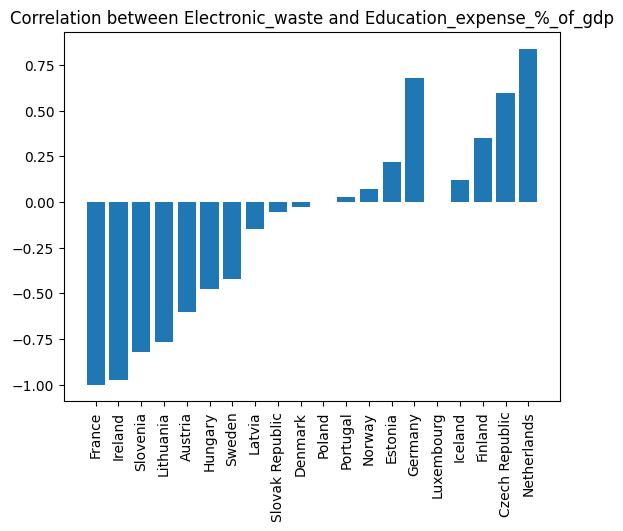

Austria:  spearman's correlation: 0.600
Germany:  spearman's correlation: 0.786
Hungary:  spearman's correlation: -0.385
Luxembourg:  spearman's correlation: nan
Netherlands:  spearman's correlation: 0.595
Norway:  spearman's correlation: -0.286
Poland:  spearman's correlation: 0.000
Portugal:  spearman's correlation: 0.582
Sweden:  spearman's correlation: -0.703
Finland:  spearman's correlation: 0.247
France:  spearman's correlation: 1.000
Slovak Republic:  spearman's correlation: -0.238
Denmark:  spearman's correlation: -0.143
Czech Republic:  spearman's correlation: 0.486
Estonia:  spearman's correlation: -0.437
Ireland:  spearman's correlation: 0.600
Iceland:  spearman's correlation: -0.333
Lithuania:  spearman's correlation: -0.539
Latvia:  spearman's correlation: -0.027
Slovenia:  spearman's correlation: -0.819


/Users/vibha/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


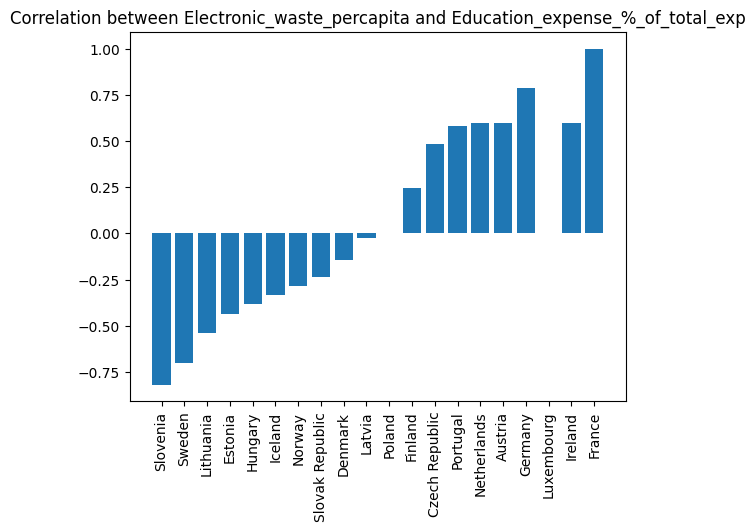

Austria:  spearman's correlation: -0.600
Germany:  spearman's correlation: 0.692
Hungary:  spearman's correlation: -0.477
Luxembourg:  spearman's correlation: nan
Netherlands:  spearman's correlation: 0.788
Norway:  spearman's correlation: 0.071
Poland:  spearman's correlation: 0.000
Portugal:  spearman's correlation: 0.018
Sweden:  spearman's correlation: -0.538
Finland:  spearman's correlation: 0.352
France:  spearman's correlation: -1.000
Slovak Republic:  spearman's correlation: -0.054
Denmark:  spearman's correlation: -0.029
Czech Republic:  spearman's correlation: 0.600
Estonia:  spearman's correlation: 0.218
Ireland:  spearman's correlation: -0.900
Iceland:  spearman's correlation: 0.050
Lithuania:  spearman's correlation: -0.775
Latvia:  spearman's correlation: -0.121
Slovenia:  spearman's correlation: -0.821


/Users/vibha/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


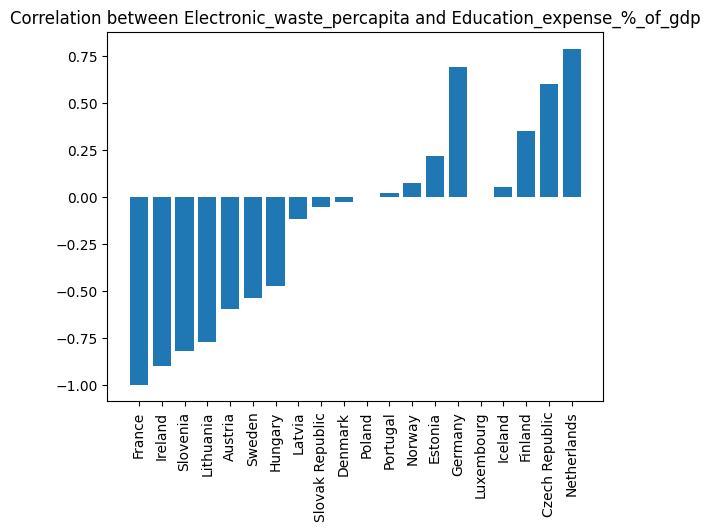

Austria:  spearman's correlation: -0.384
Belgium:  spearman's correlation: 0.629
Switzerland:  spearman's correlation: -0.096
China (People's Republic of):  spearman's correlation: -0.714
Germany:  spearman's correlation: 0.858
Spain:  spearman's correlation: 0.174
United Kingdom:  spearman's correlation: 0.715
Greece:  spearman's correlation: 0.070
Hungary:  spearman's correlation: -0.356
Italy:  spearman's correlation: -0.704
Japan:  spearman's correlation: -1.000
Korea:  spearman's correlation: -1.000
Luxembourg:  spearman's correlation: -0.393
Netherlands:  spearman's correlation: 0.588
Norway:  spearman's correlation: -0.052
Poland:  spearman's correlation: -0.346
Portugal:  spearman's correlation: -0.701
Sweden:  spearman's correlation: 0.739
United States:  spearman's correlation: 0.800
Mexico:  spearman's correlation: 0.097
Türkiye:  spearman's correlation: 0.750
Australia:  spearman's correlation: 0.671
Finland:  spearman's correlation: -0.516
France:  spearman's correlation: 

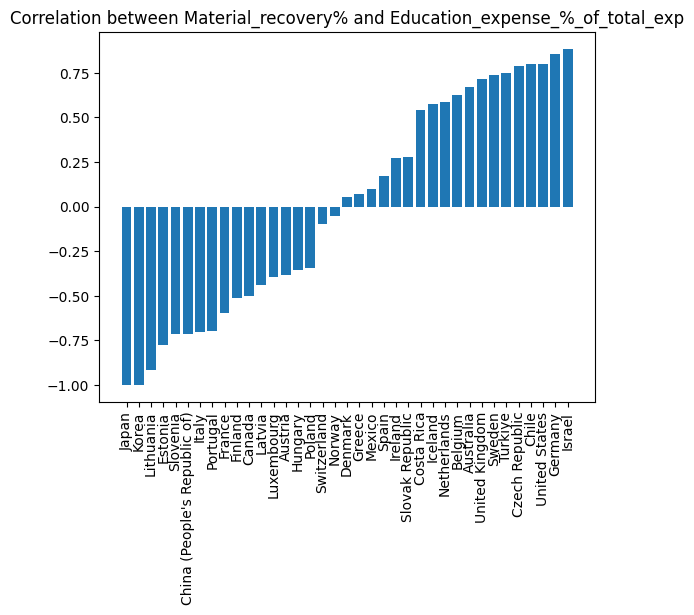

Austria:  spearman's correlation: 0.226
Belgium:  spearman's correlation: 0.511
Switzerland:  spearman's correlation: 0.251
China (People's Republic of):  spearman's correlation: -0.986
Germany:  spearman's correlation: 0.596
Spain:  spearman's correlation: -0.015
United Kingdom:  spearman's correlation: 0.848
Greece:  spearman's correlation: 0.636
Hungary:  spearman's correlation: -0.362
Italy:  spearman's correlation: -0.681
Japan:  spearman's correlation: 0.004
Korea:  spearman's correlation: 0.154
Luxembourg:  spearman's correlation: 0.095
Netherlands:  spearman's correlation: 0.119
Norway:  spearman's correlation: -0.216
Poland:  spearman's correlation: -0.359
Portugal:  spearman's correlation: 0.006
Sweden:  spearman's correlation: 0.370
United States:  spearman's correlation: 0.400
Mexico:  spearman's correlation: 0.919
Türkiye:  spearman's correlation: 0.765
Australia:  spearman's correlation: 0.615
Finland:  spearman's correlation: 0.153
France:  spearman's correlation: -0.429

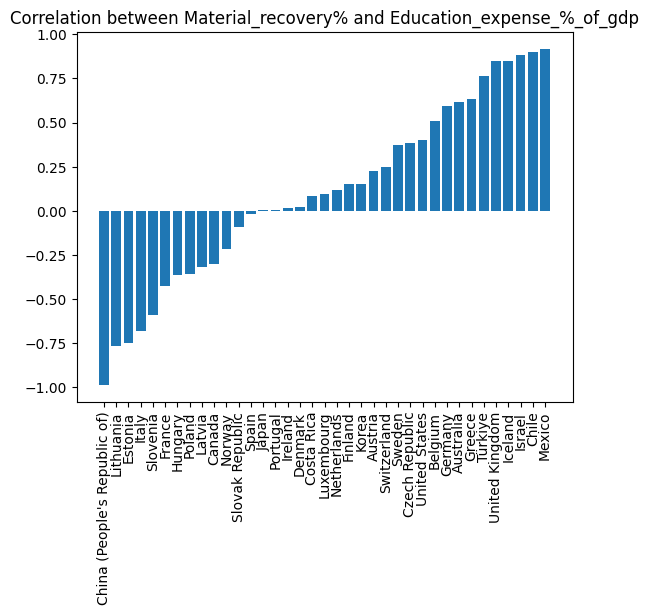

Austria:  spearman's correlation: 1.000
Germany:  spearman's correlation: 0.600
Hungary:  spearman's correlation: 0.800
Netherlands:  spearman's correlation: 0.975
Norway:  spearman's correlation: 0.400
Poland:  spearman's correlation: 1.000
Portugal:  spearman's correlation: -0.427
Sweden:  spearman's correlation: -0.154
United States:  spearman's correlation: 1.000
Finland:  spearman's correlation: -0.300
France:  spearman's correlation: 0.800
Slovak Republic:  spearman's correlation: 1.000
Denmark:  spearman's correlation: 1.000
Czech Republic:  spearman's correlation: -0.200
Lithuania:  spearman's correlation: -0.900
Latvia:  spearman's correlation: 0.200
Slovenia:  spearman's correlation: 1.000


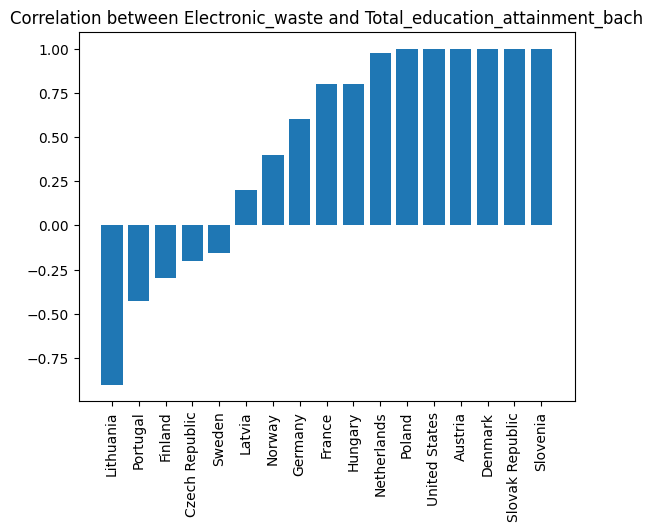

Austria:  spearman's correlation: 1.000
Germany:  spearman's correlation: 0.600
Hungary:  spearman's correlation: 0.800
Netherlands:  spearman's correlation: 0.900
Norway:  spearman's correlation: 0.400
Poland:  spearman's correlation: 1.000
Portugal:  spearman's correlation: -0.378
Sweden:  spearman's correlation: -0.200
United States:  spearman's correlation: 1.000
Finland:  spearman's correlation: -0.300
France:  spearman's correlation: 0.800
Slovak Republic:  spearman's correlation: 1.000
Denmark:  spearman's correlation: 1.000
Czech Republic:  spearman's correlation: -0.200
Lithuania:  spearman's correlation: -0.700
Latvia:  spearman's correlation: 0.200
Slovenia:  spearman's correlation: 1.000


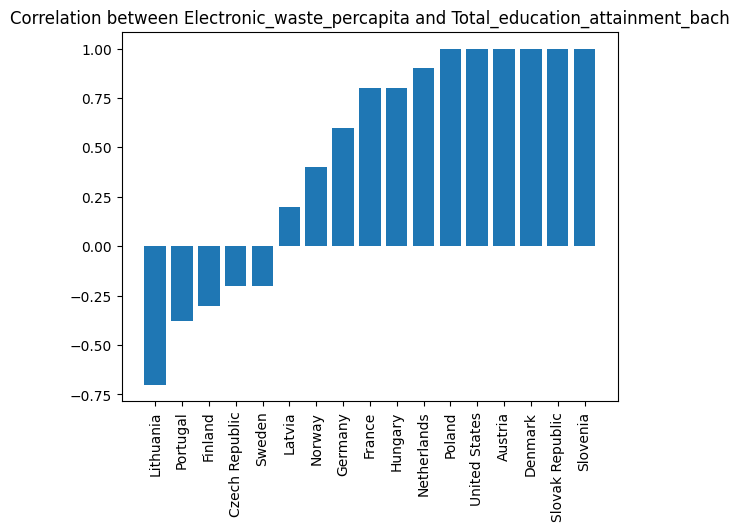

Austria:  spearman's correlation: 0.800
Belgium:  spearman's correlation: 0.771
Germany:  spearman's correlation: 0.800
Spain:  spearman's correlation: 1.000
United Kingdom:  spearman's correlation: -0.200
Greece:  spearman's correlation: -0.500
Hungary:  spearman's correlation: 0.700
Korea:  spearman's correlation: -1.000
Netherlands:  spearman's correlation: 1.000
Norway:  spearman's correlation: -0.500
Poland:  spearman's correlation: 1.000
Portugal:  spearman's correlation: 0.945
Sweden:  spearman's correlation: -0.714
United States:  spearman's correlation: 0.000
Australia:  spearman's correlation: -0.714
Finland:  spearman's correlation: 0.771
France:  spearman's correlation: 0.900
Slovak Republic:  spearman's correlation: 1.000
Denmark:  spearman's correlation: 1.000
Czech Republic:  spearman's correlation: 0.900
Ireland:  spearman's correlation: -0.500
Lithuania:  spearman's correlation: 0.943
Latvia:  spearman's correlation: 0.771
Slovenia:  spearman's correlation: 0.900
Chile

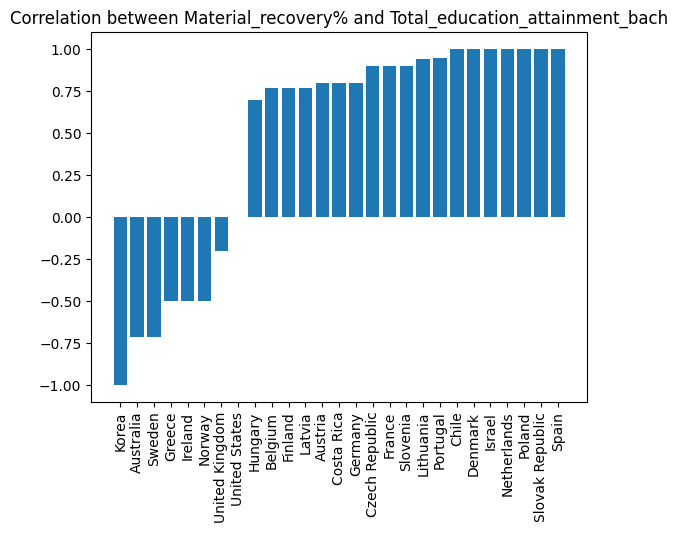

Austria:  spearman's correlation: 1.000
Germany:  spearman's correlation: 0.800
Hungary:  spearman's correlation: 0.600
Netherlands:  spearman's correlation: 0.975
Norway:  spearman's correlation: 0.400
Poland:  spearman's correlation: 1.000
Portugal:  spearman's correlation: -0.427
Sweden:  spearman's correlation: -0.154
United States:  spearman's correlation: 1.000
Finland:  spearman's correlation: -0.300
France:  spearman's correlation: 0.800
Slovak Republic:  spearman's correlation: 1.000
Denmark:  spearman's correlation: 1.000
Czech Republic:  spearman's correlation: -0.200
Lithuania:  spearman's correlation: -0.900
Latvia:  spearman's correlation: 0.200
Slovenia:  spearman's correlation: 1.000


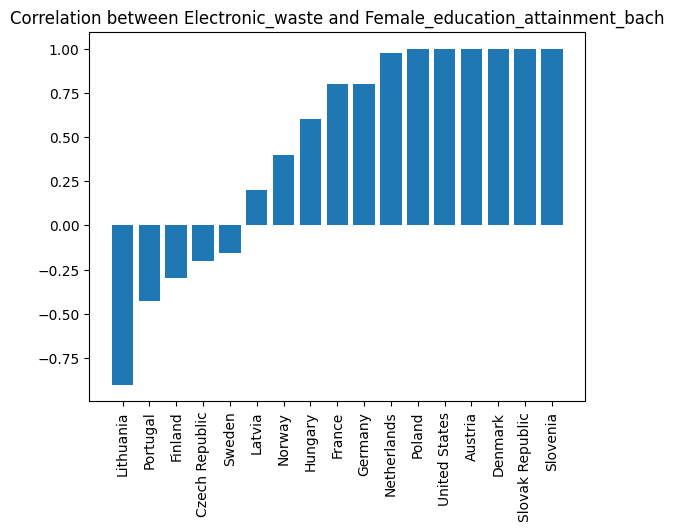

Austria:  spearman's correlation: 1.000
Germany:  spearman's correlation: 0.800
Hungary:  spearman's correlation: 0.600
Netherlands:  spearman's correlation: 0.900
Norway:  spearman's correlation: 0.400
Poland:  spearman's correlation: 1.000
Portugal:  spearman's correlation: -0.378
Sweden:  spearman's correlation: -0.200
United States:  spearman's correlation: 1.000
Finland:  spearman's correlation: -0.300
France:  spearman's correlation: 0.800
Slovak Republic:  spearman's correlation: 1.000
Denmark:  spearman's correlation: 1.000
Czech Republic:  spearman's correlation: -0.200
Lithuania:  spearman's correlation: -0.700
Latvia:  spearman's correlation: 0.200
Slovenia:  spearman's correlation: 1.000


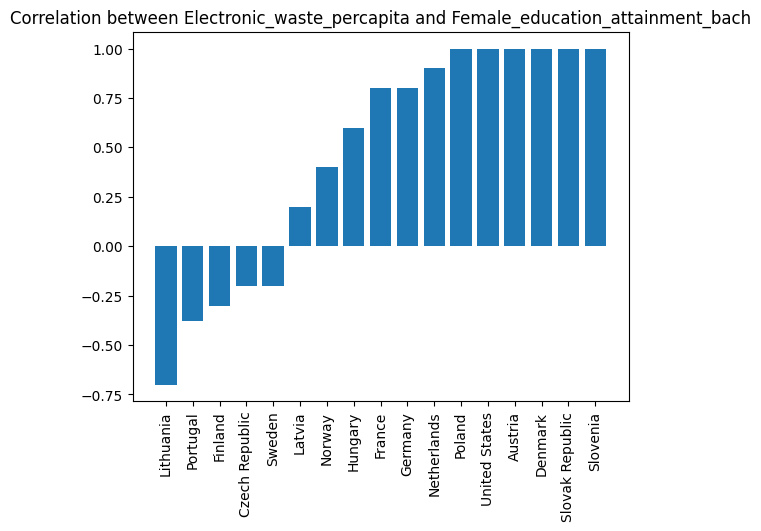

Austria:  spearman's correlation: 0.800
Belgium:  spearman's correlation: 0.771
Germany:  spearman's correlation: 1.000
Spain:  spearman's correlation: 1.000
United Kingdom:  spearman's correlation: -0.200
Greece:  spearman's correlation: -0.500
Hungary:  spearman's correlation: 0.600
Korea:  spearman's correlation: -1.000
Netherlands:  spearman's correlation: 1.000
Norway:  spearman's correlation: -0.500
Poland:  spearman's correlation: 1.000
Portugal:  spearman's correlation: 0.945
Sweden:  spearman's correlation: -0.714
United States:  spearman's correlation: 0.000
Australia:  spearman's correlation: -0.714
Finland:  spearman's correlation: 0.771
France:  spearman's correlation: 0.900
Slovak Republic:  spearman's correlation: 1.000
Denmark:  spearman's correlation: 1.000
Czech Republic:  spearman's correlation: 0.900
Ireland:  spearman's correlation: -0.500
Lithuania:  spearman's correlation: 0.943
Latvia:  spearman's correlation: 0.771
Slovenia:  spearman's correlation: 0.900
Chile

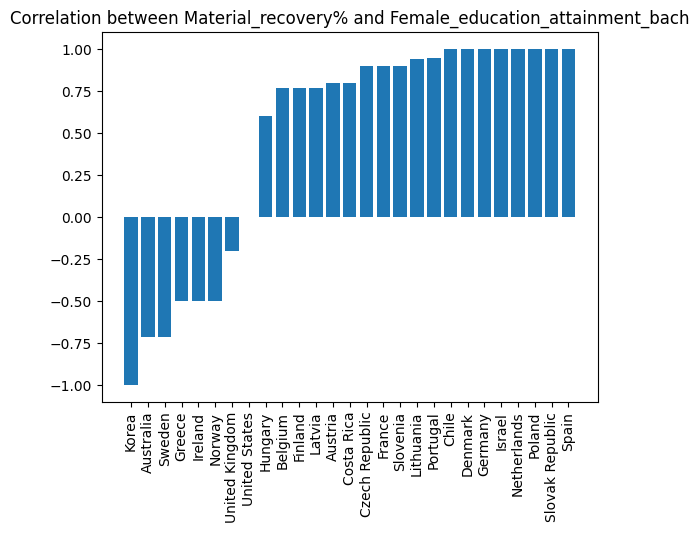

Austria:  spearman's correlation: 1.000
Germany:  spearman's correlation: -0.400
Hungary:  spearman's correlation: 0.800
Netherlands:  spearman's correlation: 0.975
Norway:  spearman's correlation: 0.400
Poland:  spearman's correlation: 1.000
Portugal:  spearman's correlation: -0.413
Sweden:  spearman's correlation: -0.154
United States:  spearman's correlation: -1.000
Finland:  spearman's correlation: -0.300
France:  spearman's correlation: 0.800
Slovak Republic:  spearman's correlation: 0.829
Denmark:  spearman's correlation: -0.200
Czech Republic:  spearman's correlation: -0.200
Lithuania:  spearman's correlation: -0.900
Latvia:  spearman's correlation: 0.700
Slovenia:  spearman's correlation: 0.800


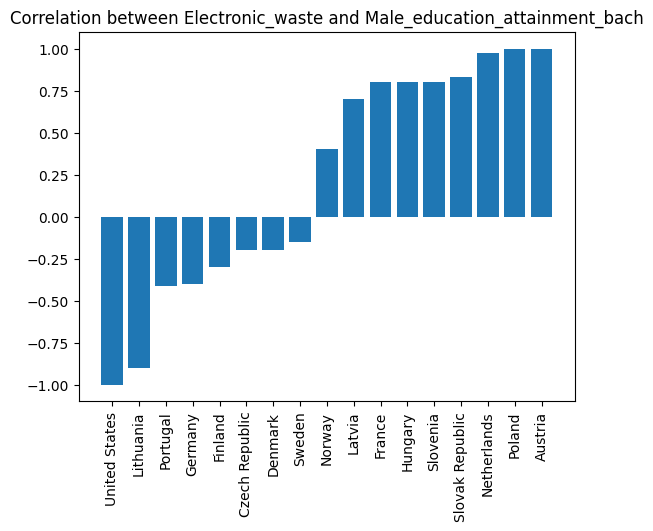

Austria:  spearman's correlation: 1.000
Germany:  spearman's correlation: -0.400
Hungary:  spearman's correlation: 0.800
Netherlands:  spearman's correlation: 0.900
Norway:  spearman's correlation: 0.400
Poland:  spearman's correlation: 1.000
Portugal:  spearman's correlation: -0.364
Sweden:  spearman's correlation: -0.200
United States:  spearman's correlation: -1.000
Finland:  spearman's correlation: -0.300
France:  spearman's correlation: 0.800
Slovak Republic:  spearman's correlation: 0.829
Denmark:  spearman's correlation: -0.200
Czech Republic:  spearman's correlation: -0.200
Lithuania:  spearman's correlation: -0.700
Latvia:  spearman's correlation: 0.700
Slovenia:  spearman's correlation: 0.800


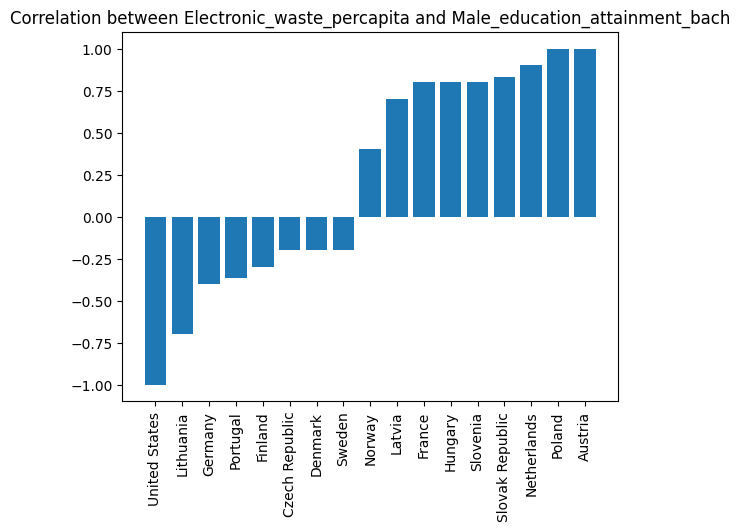

Austria:  spearman's correlation: 0.800
Belgium:  spearman's correlation: 0.771
Germany:  spearman's correlation: -0.200
Spain:  spearman's correlation: 1.000
United Kingdom:  spearman's correlation: -0.200
Greece:  spearman's correlation: -0.500
Hungary:  spearman's correlation: 0.700
Korea:  spearman's correlation: -1.000
Netherlands:  spearman's correlation: 1.000
Norway:  spearman's correlation: -0.500
Poland:  spearman's correlation: 1.000
Portugal:  spearman's correlation: 0.956
Sweden:  spearman's correlation: -0.714
United States:  spearman's correlation: -0.100
Australia:  spearman's correlation: -0.714
Finland:  spearman's correlation: 0.771
France:  spearman's correlation: 0.900
Slovak Republic:  spearman's correlation: 0.893
Denmark:  spearman's correlation: 0.000
Czech Republic:  spearman's correlation: 0.700
Ireland:  spearman's correlation: -0.500
Lithuania:  spearman's correlation: 0.943
Latvia:  spearman's correlation: 0.371
Slovenia:  spearman's correlation: 0.800
Chi

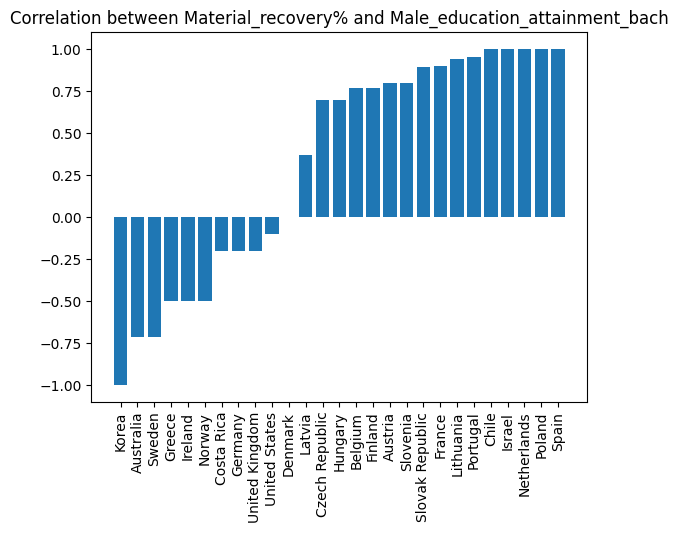

In [39]:
for variable_pair in corr_varlist: 
    cor_country_list = []
    Cor_educ_exp_total_electronic_list = []
    for country in Country_list:
        temp_var = hyp1_df.where(hyp1_df['Country']==country)
        temp_var = temp_var.dropna(subset = [variable_pair[0],variable_pair[1]])
        if len(temp_var[variable_pair[0]]) <2 or len(temp_var[variable_pair[1]]) <2:
            continue   
        corr, _ = spearmanr(temp_var[variable_pair[0]], temp_var[variable_pair[1]])
        Cor_educ_exp_total_electronic_list.append(corr)
        cor_country_list.append(country)
        print(country + ': ' + ' spearman\'s correlation: %.3f' % corr)

    Cor_educ_exp_total_electronic_list, cor_country_list,  = (list(t) for t in zip(*sorted(zip(Cor_educ_exp_total_electronic_list, cor_country_list))))
    plt.bar(cor_country_list, Cor_educ_exp_total_electronic_list)
    plt.title('Correlation between ' + variable_pair[0] + ' and ' + variable_pair[1])
    plt.xticks(rotation = 90)
    plt.show()    

###### Observations:

1. Electronic waste generation & Education expense as % of total govt. expsense: France has a perfect positive correlation of 100%. Netherlands, Germany and Austria also have a strong positive correlation. Same was true when we evaluated against electronic waste per capita. 


2. Electronic waste generation & Education expense as % of GDP: France has a perfect negative correlation. Austria, Ireland, Lithuania and Slovania also have a strong negative correlation. Netherlands has a strong positive correlation. Same was true when we evaluated against electronic waste per capita. 


3. Material Recovery & Education expense as % of total govt. expsense: Czech Republic, Chile, US, Germany and Israel have strong positive correlation. China, Italy, Japan (-100%), Korea (-100%), Lithuania, Estonia and Slovenia all have a strong negative correlation. 


4. Material Recovery & Education expense as % of GDP: BAustralia, Greece, Turkey, UK, Iceland, Israel, Chile and Mexico have a strong positive correlation. Our hypothesis was proven correct for these countries. China (-100%), Lithuania, Estonia, Italy, and Slovenia have a strong negative correlation. 


5. Electronic waste generation & Total Education Attainment: Slovenia (100%), Slovakia, Denmark, Austria, US, Poland, and Netherlands have perfect correlation with electronic waste generation. Same was noted when compared to electronic waste per capita. he same was the case when compared against Female & Male Education Attainment. 


6. Material Recovery & Total Education Attainment: Spain (100%), Slovakia, Poland, Netherlands, Israel, Denmark, Chile, Portugal, Lithuania, and Slovenia all have a strong positive correlation. The same was the case when compared against Female & Male Education Attainment. 

### Subplots for each country for Material Recovery (%) and Electronic Waste per Capita

(<Figure size 2000x3000 with 44 Axes>,
 array([[<AxesSubplot: title={'center': 'Austria'}, xlabel='Time', ylabel='Material_recovery%'>,
         <AxesSubplot: title={'center': 'Belgium'}, xlabel='Time', ylabel='Material_recovery%'>,
         <AxesSubplot: title={'center': 'Switzerland'}, xlabel='Time', ylabel='Material_recovery%'>,
         <AxesSubplot: title={'center': "China (People's Republic of)"}, xlabel='Time', ylabel='Material_recovery%'>],
        [<AxesSubplot: title={'center': 'Germany'}, xlabel='Time', ylabel='Material_recovery%'>,
         <AxesSubplot: title={'center': 'Spain'}, xlabel='Time', ylabel='Material_recovery%'>,
         <AxesSubplot: title={'center': 'United Kingdom'}, xlabel='Time', ylabel='Material_recovery%'>,
         <AxesSubplot: title={'center': 'Greece'}, xlabel='Time', ylabel='Material_recovery%'>],
        [<AxesSubplot: title={'center': 'Hungary'}, xlabel='Time', ylabel='Material_recovery%'>,
         <AxesSubplot: title={'center': 'Italy'}, xlabel=

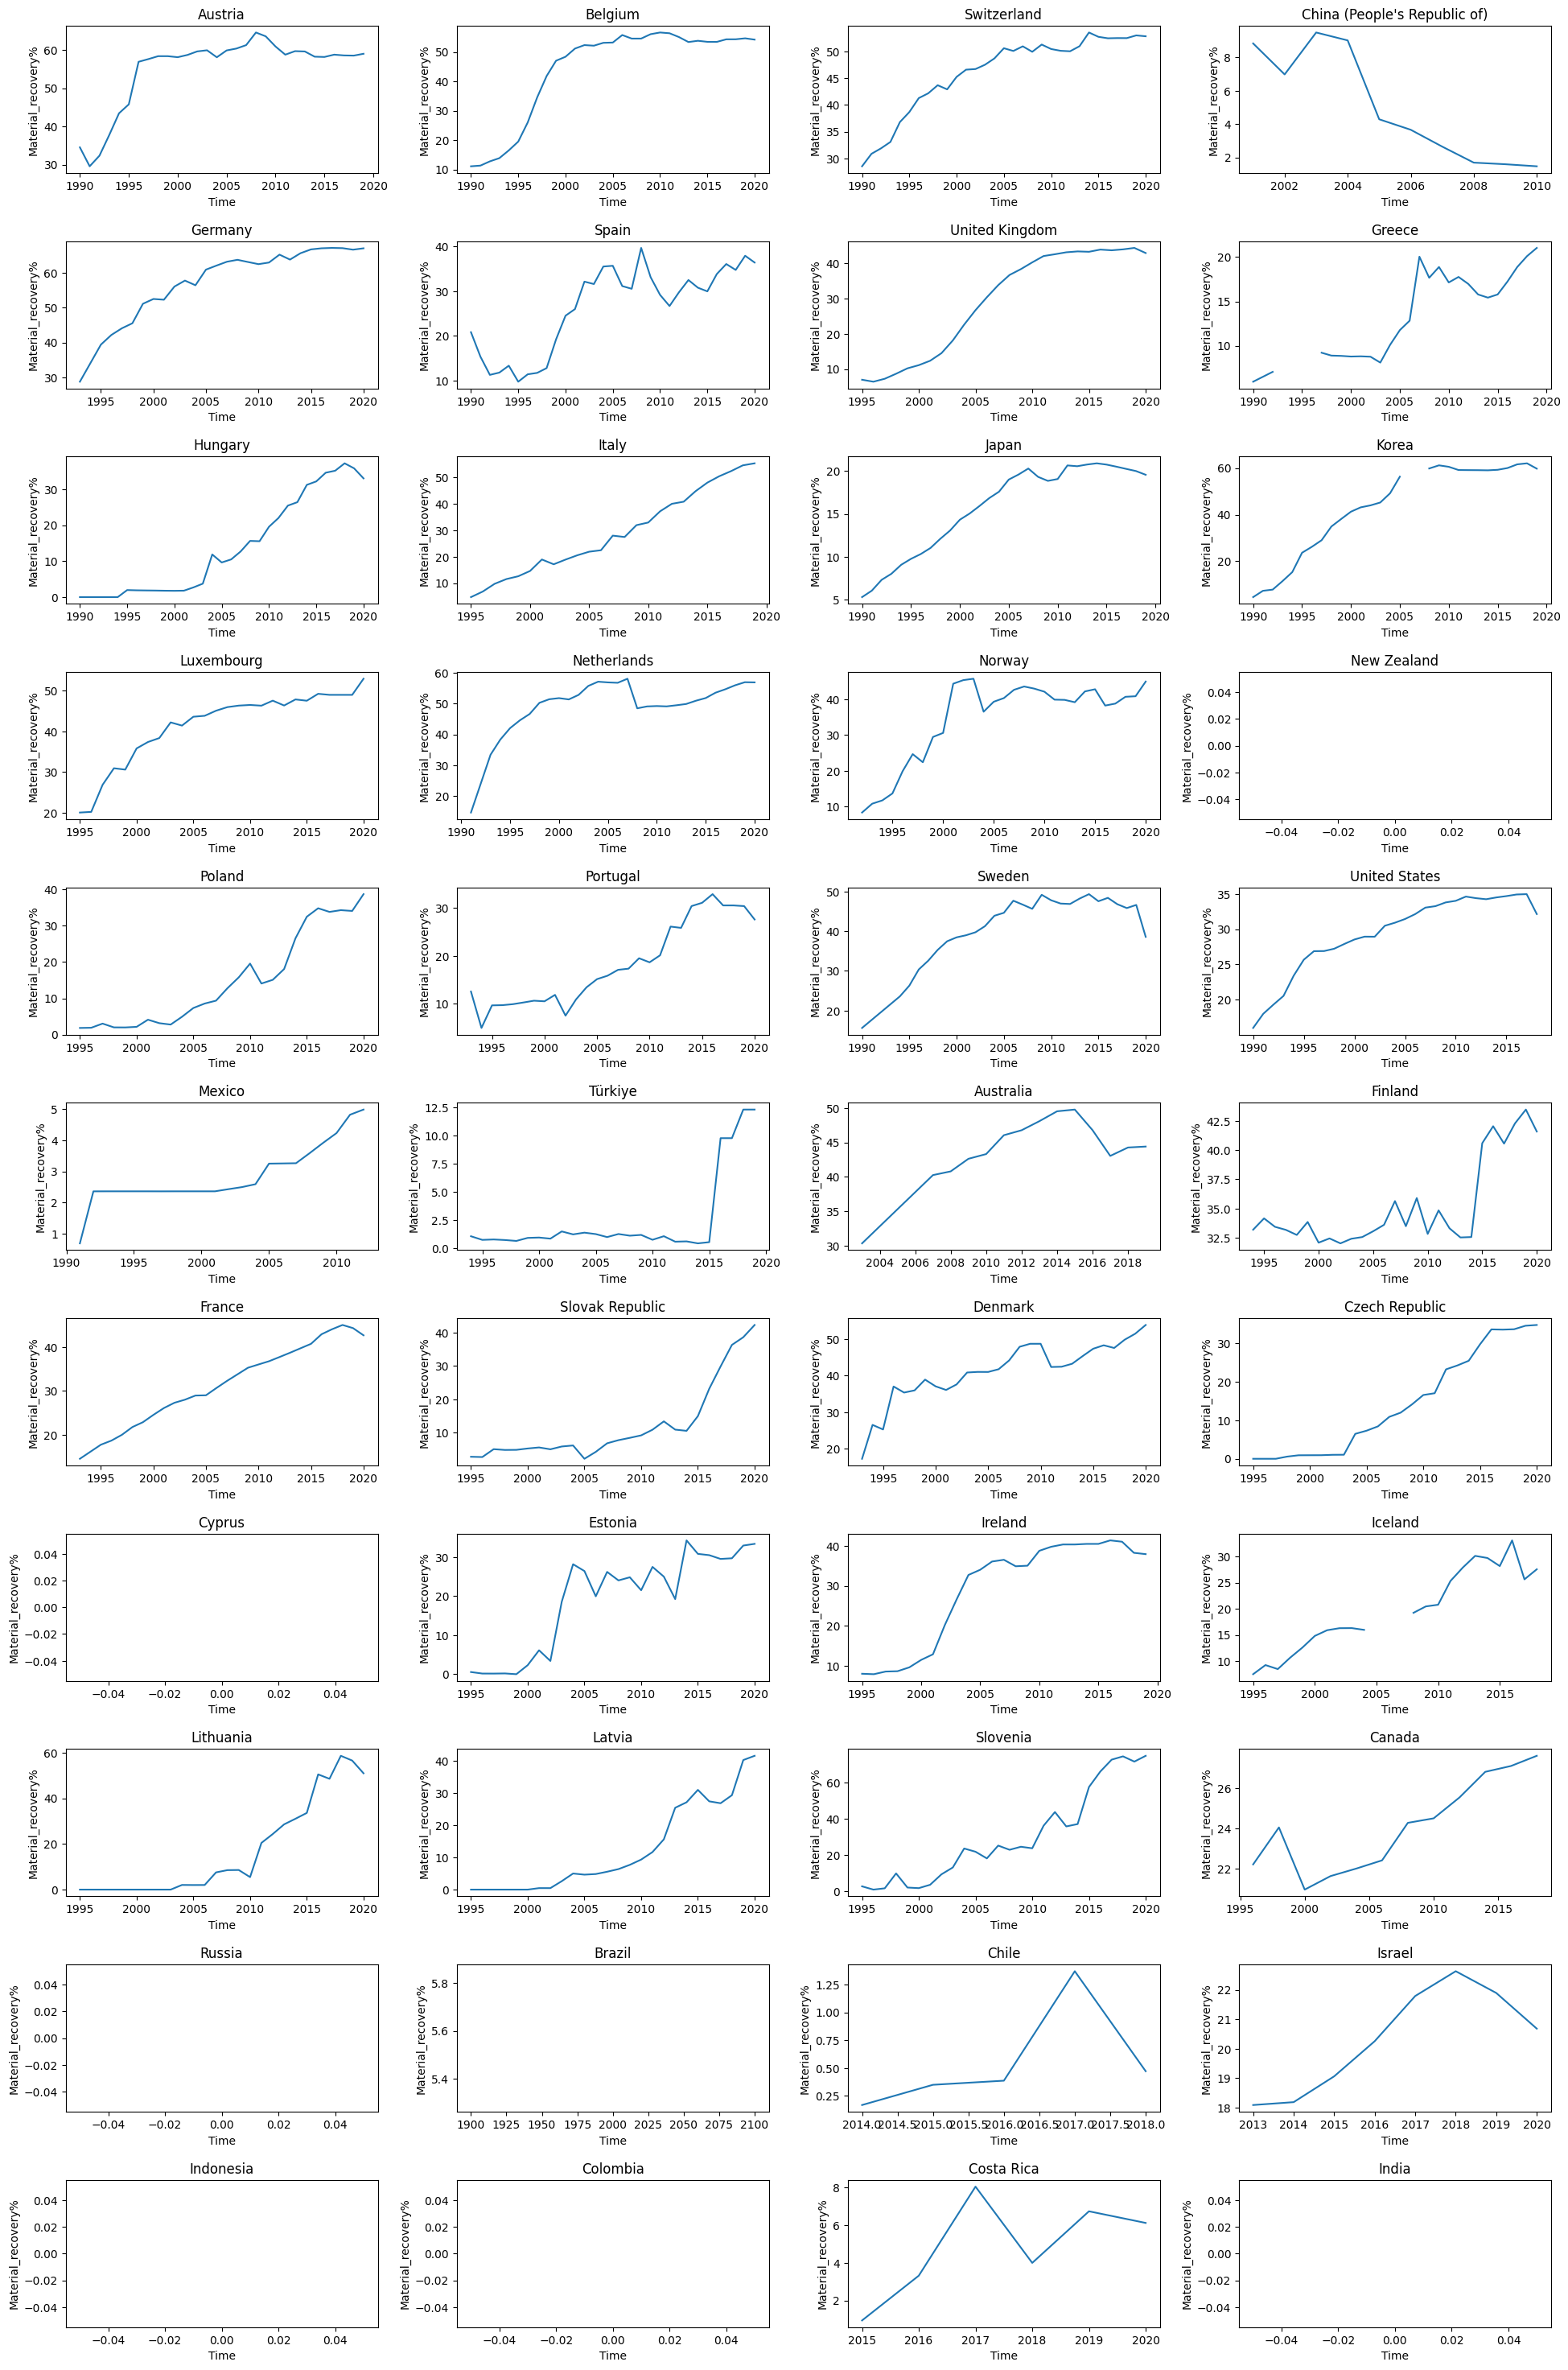

In [28]:
cc2.time_series_subplots(hyp1_df, 'Material_recovery%')

###### Observations:
1. Overall Downward trending: China has had a sharp downward trending curve since 2000 (no data prior to it). Chile and Israel have had a downward trending curve in the recent years, since 2018. 

2. No data: New zealand, Cyprus, Russia, Brazil, Indonesia, Colombia and India have no data to plot. 

3. Upward trending: All other countries have had an upward trending curve, in a way confirming our hypothesis. 

(<Figure size 2000x3000 with 44 Axes>,
 array([[<AxesSubplot: title={'center': 'Austria'}, xlabel='Time', ylabel='Electronic_waste_percapita'>,
         <AxesSubplot: title={'center': 'Belgium'}, xlabel='Time', ylabel='Electronic_waste_percapita'>,
         <AxesSubplot: title={'center': 'Switzerland'}, xlabel='Time', ylabel='Electronic_waste_percapita'>,
         <AxesSubplot: title={'center': "China (People's Republic of)"}, xlabel='Time', ylabel='Electronic_waste_percapita'>],
        [<AxesSubplot: title={'center': 'Germany'}, xlabel='Time', ylabel='Electronic_waste_percapita'>,
         <AxesSubplot: title={'center': 'Spain'}, xlabel='Time', ylabel='Electronic_waste_percapita'>,
         <AxesSubplot: title={'center': 'United Kingdom'}, xlabel='Time', ylabel='Electronic_waste_percapita'>,
         <AxesSubplot: title={'center': 'Greece'}, xlabel='Time', ylabel='Electronic_waste_percapita'>],
        [<AxesSubplot: title={'center': 'Hungary'}, xlabel='Time', ylabel='Electronic_wast

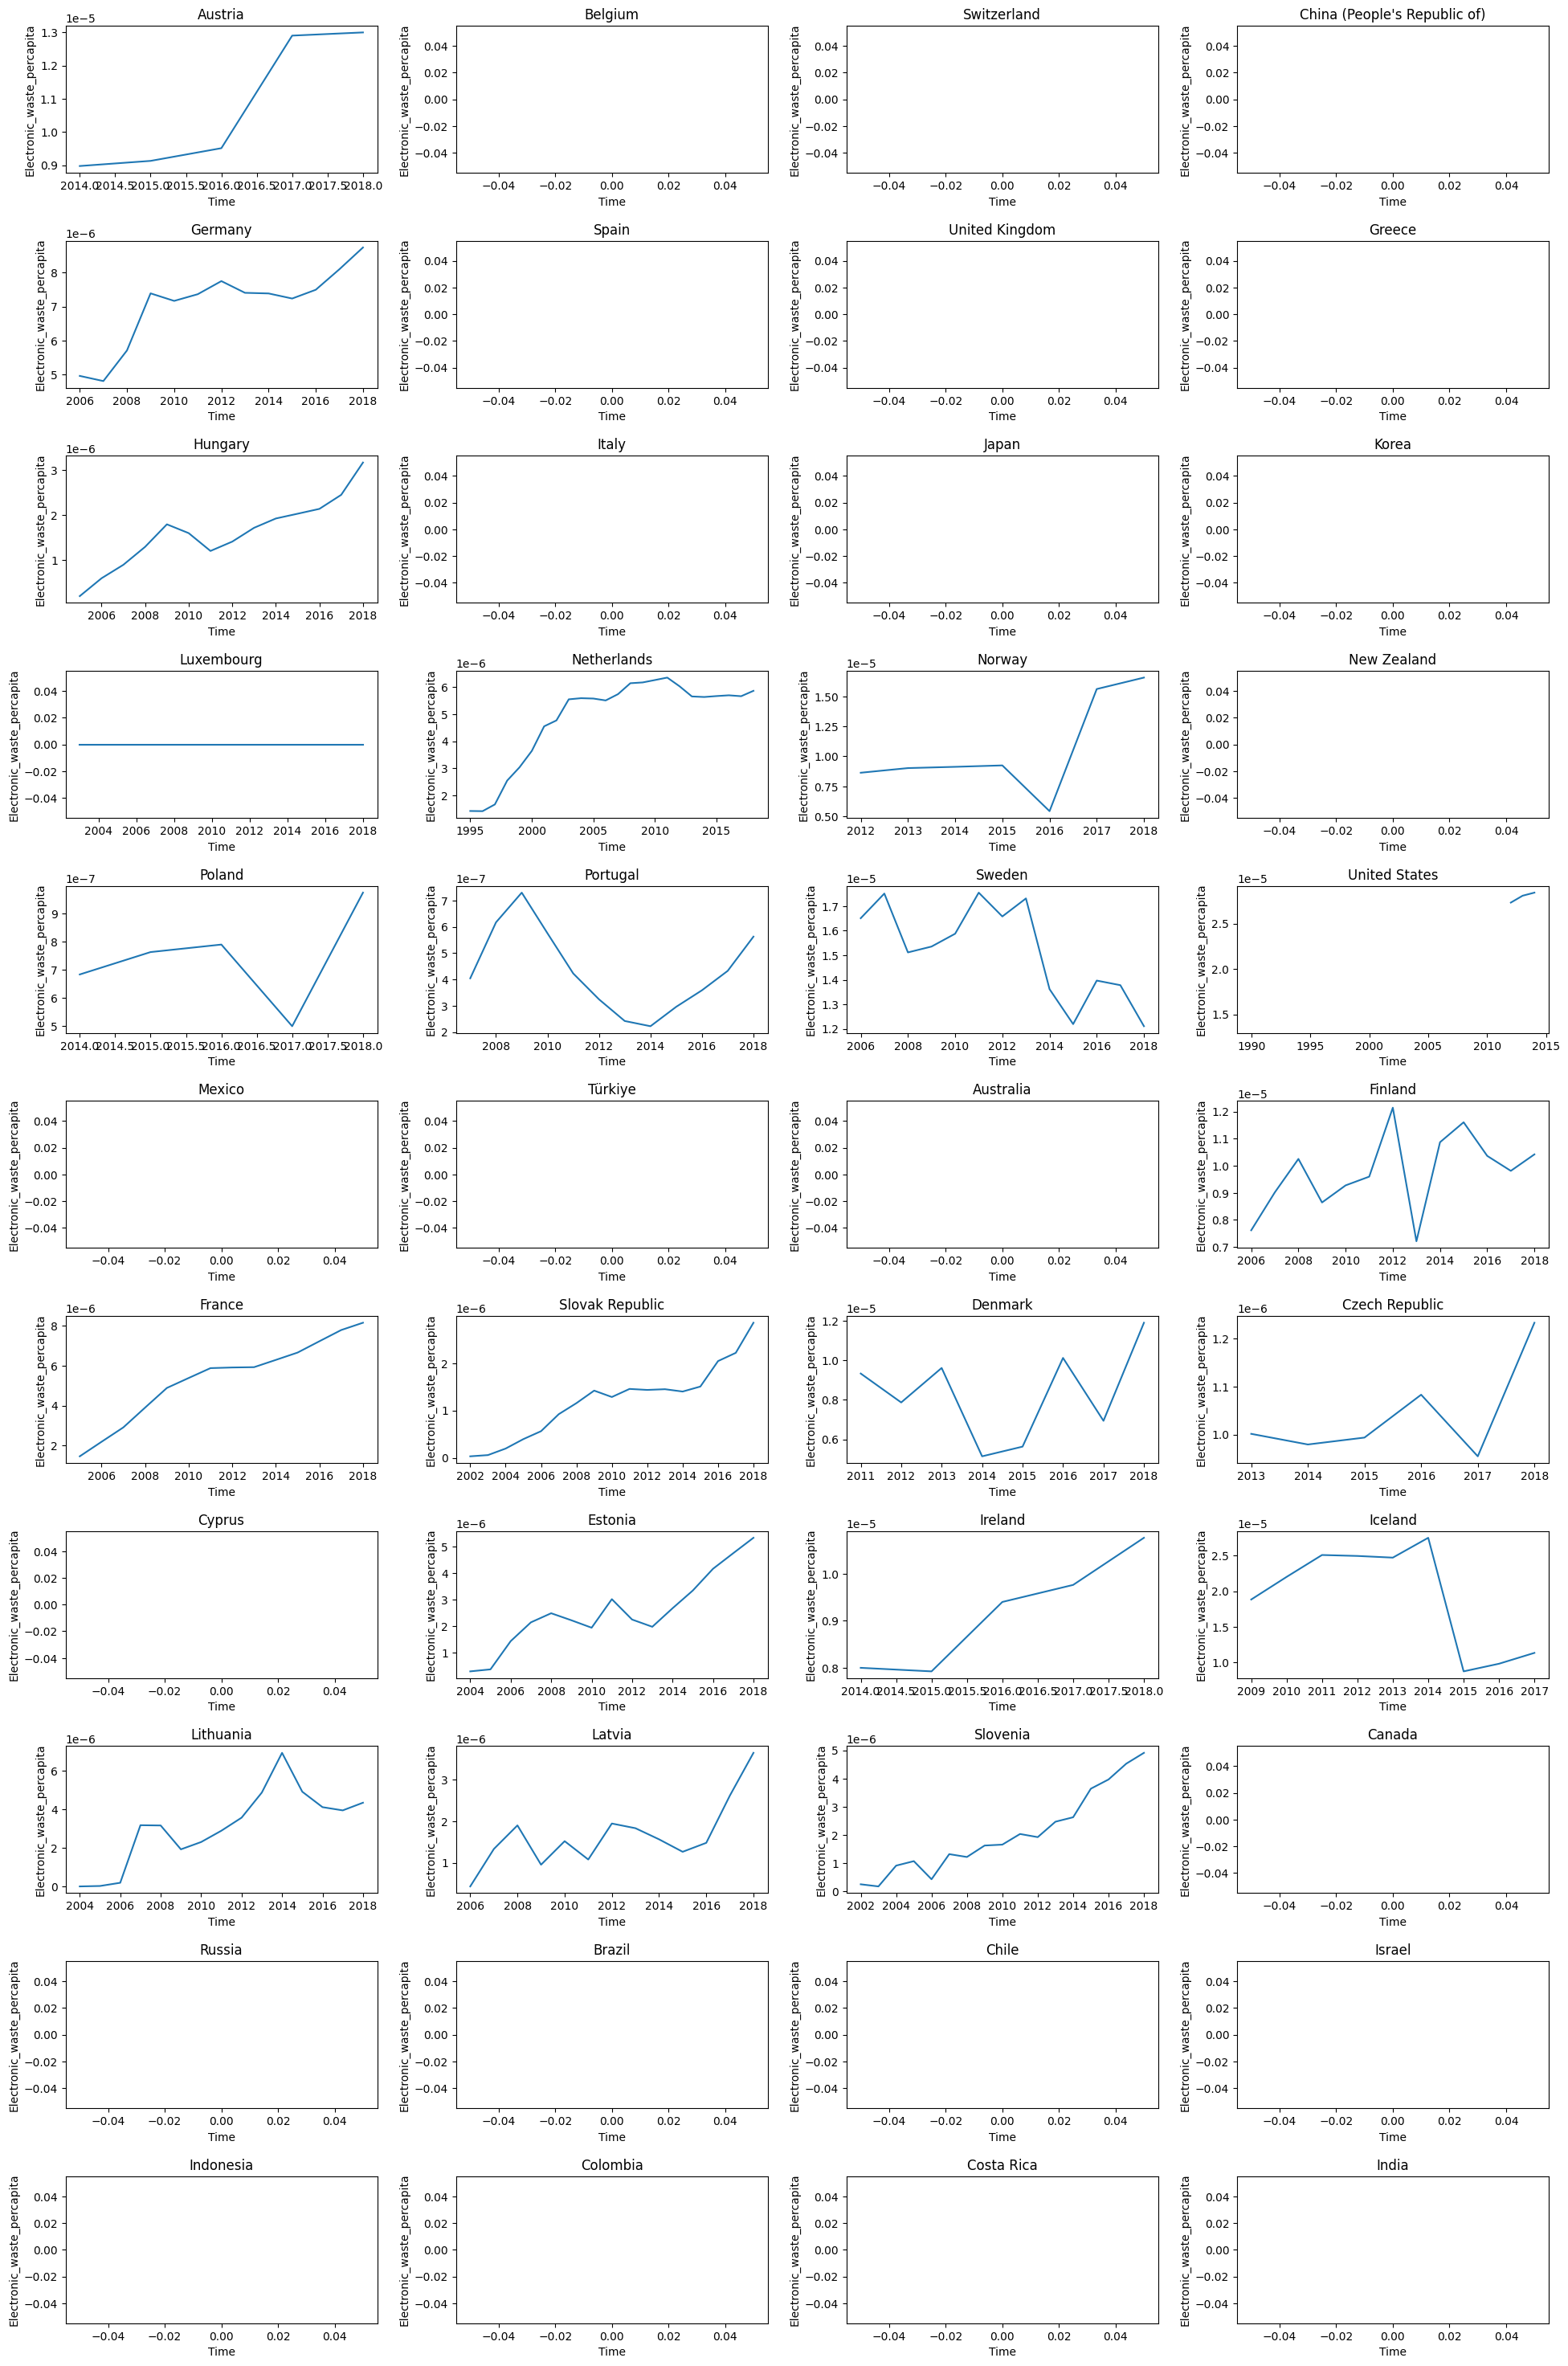

In [29]:
cc2.time_series_subplots(hyp1_df, 'Electronic_waste_percapita')

###### Observations:
1. Downward trending: Sweden has had an overall downward trending curve. 

2. No data: Belgium, Switzerland, China, Spain, UK, Greece, Italy, Japan, Korea, New zealand, US, Mexico, Turkey, Australia, Canada, Russia, razil, Chile, Israel, Indonesia, Colombia, Costa Rica and India have no data. 

3. Upward trending: Lithuania, Latvia, Slovenia, Ireland, Estonia, France, Slovakia, Austria, Germany, Hungary, Netherlands, Norway, Poland, Portugal, Denmark (recent years), Czech Republic; all have upward sloping curves. 

  Luxembourg has had a constant path all along. 

The data available also confirms our hypothesis.